In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers.shear_helpers as sh
#New Push

In [2]:
load_position = [-52, -228, -392, -568, -732, -908]
# P = [-91, -91, -67.5, -67.5, -67.5, -67.5]
P = [-66.7]*6
max_length = 1250
reaction_locations = (25, 1225)
train_length = 960

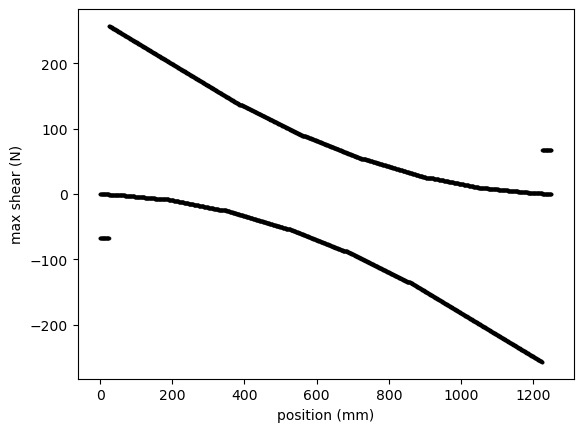

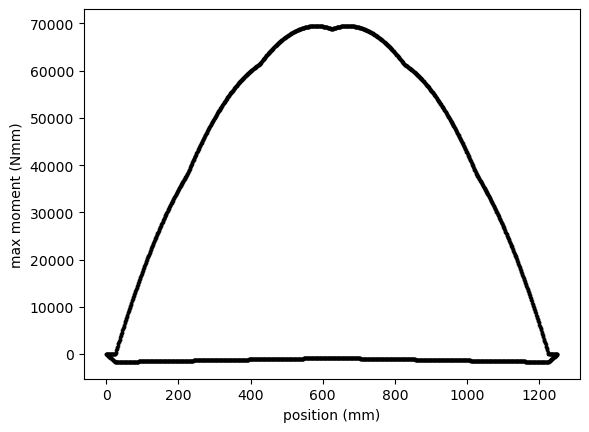

15.11866666666667
Max Shear: 257.1285
Max Moment: 69480.05600000042


In [3]:
loads_mag = sh.get_loads(-452)
loads = sh.find_loads(1105, loads_mag, load_position, max_length)
reactions = sh.find_reaction(loads,reaction_locations)
shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
shears = sh.find_shear(shear, max_length)
moments = sh.find_moment(shear, max_length)
envelope_shear = sh.envelope(sh.find_shear, P, load_position, reaction_locations, max_length, train_length)
envelope_moment = sh.envelope(sh.find_moment, P, load_position, reaction_locations, max_length, train_length)
sh.plot_envelope(envelope_shear[0],envelope_shear[2],  "position (mm)", "max shear (N)", "images/shear.png")
sh.plot_envelope(envelope_moment[0],envelope_moment[2],  "position (mm)", "max moment (Nmm)", "images/moment.png")
print(envelope_shear[0][1000])
print(f"Max Shear: {max(list(envelope_shear[0].values()))}")
print(f"Max Moment: {max(list(envelope_moment[0].values()))}")